In [ ]:
#2. Load the dataset.
import pandas as pd

df = pd.read_csv('/content/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


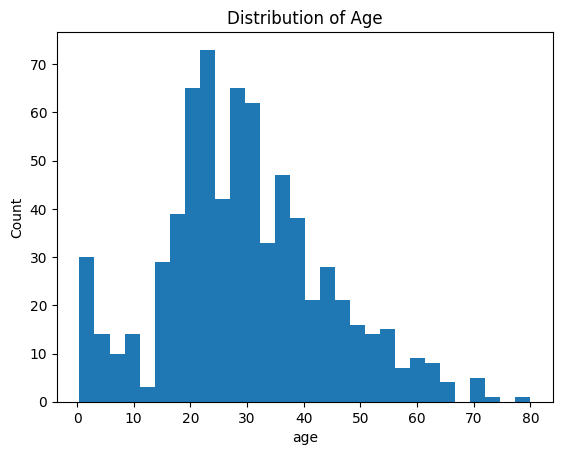

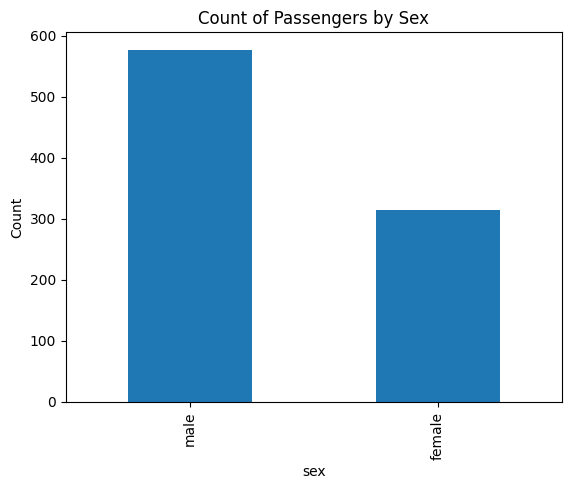

In [ ]:
#3.
# Uni-Variate analysis
import matplotlib.pyplot as plt

# Plotting histogram for 'Age'
plt.hist(df['age'].dropna(), bins=30)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Plotting bar plot for 'Sex'
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex')
plt.show()


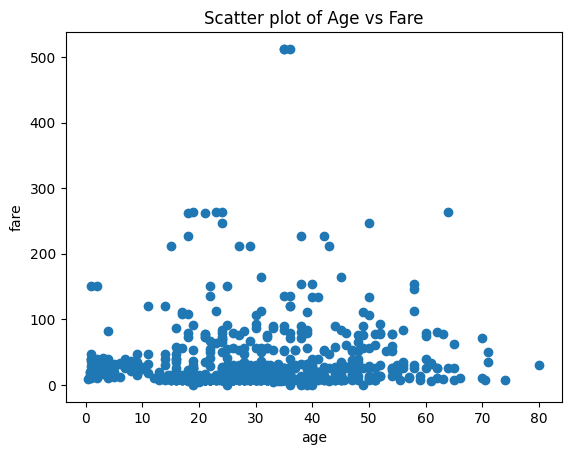

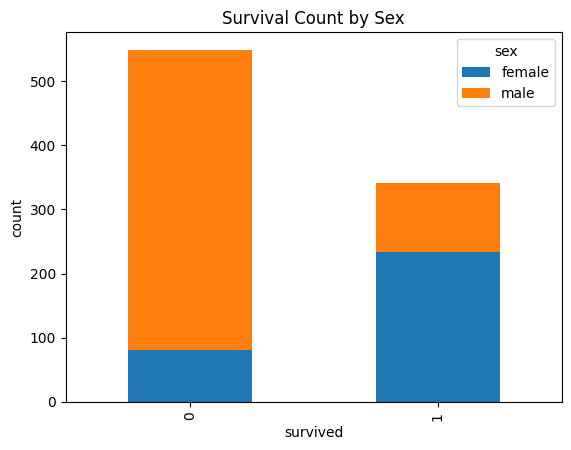

In [ ]:
#3.
# Bi-Variate analysis
# Plotting scatter plot between 'Age' and 'Fare'
plt.scatter(df['age'], df['fare'])
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Scatter plot of Age vs Fare')
plt.show()

# Plotting stacked bar plot between 'Survived' and 'Sex'
survived_sex = df.groupby(['survived', 'sex']).size().unstack()
survived_sex.plot(kind='bar', stacked=True)
plt.xlabel('survived')
plt.ylabel('count')
plt.title('Survival Count by Sex')
plt.show()


<ipython-input-8-d855729da561>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


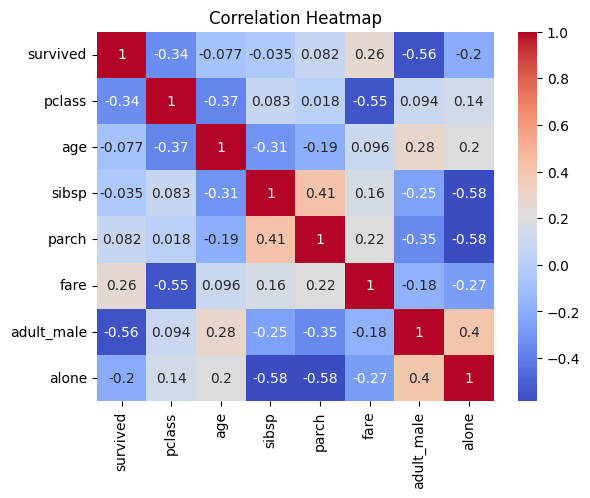

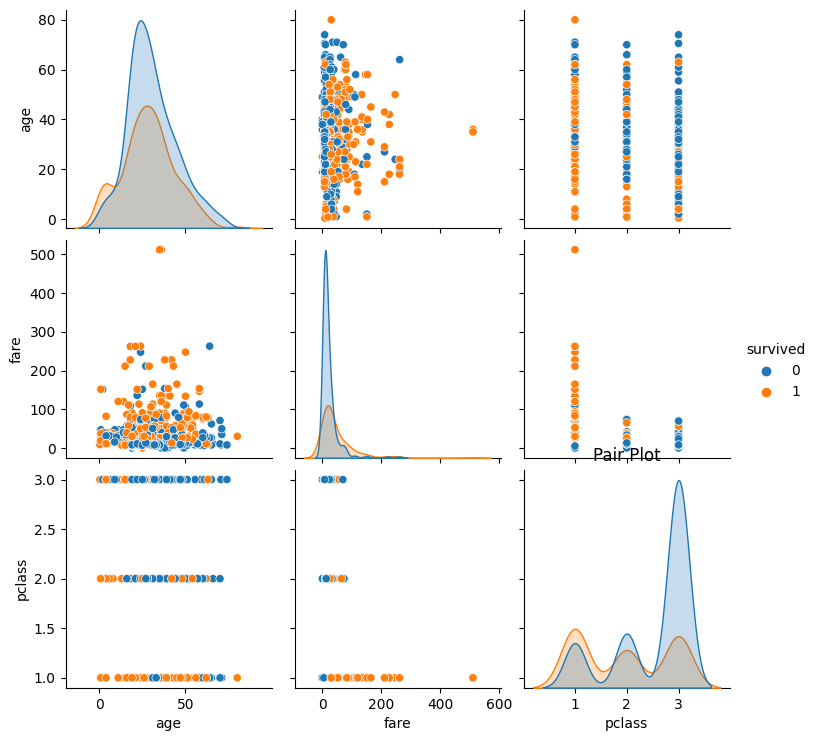

In [ ]:
#3.
# Multi-Variate analysis
import seaborn as sns

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot
sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='survived')
plt.title('Pair Plot')
plt.show()

In [ ]:
#4. Calculate descriptive statistics for all columns
descriptive_stats = df.describe(include='all')

# Display the descriptive statistics
print(descriptive_stats)


          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [ ]:
#5.  Handle the Missing values.
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

# Fill missing values with mean for numerical columns
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

# Fill missing values with mode for categorical columns
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
#6. Find the outliers and replace the outliers.
# Calculate the IQR for 'Age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
# Define the threshold for outliers
threshold = 1.5 * IQR
# Find outliers in 'Age' column
outliers_age = df[(df['age'] < Q1 - threshold) | (df['age'] > Q3 + threshold)]
# Replace outliers in 'Age' column with the median
median_age = df['age'].median()
df.loc[outliers_age.index, 'age'] = median_age

In [ ]:
#7. Check for Categorical columns and perform encoding
# Check the data types of columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Replace the original dataset with the encoded dataset
df = df_encoded

In [ ]:
#8. Split the data into dependent and independent variables.
# Separate the dependent variable (target) from the independent variables (features)
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent variable

In [ ]:
#9. Scale the independent variables
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

In [ ]:
#10. Split the data into training and testing.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)